# Import Liberary

In [2]:
import numpy as np
import pandas as pd

# Import Source File

In [3]:
df_file1 = pd.read_csv("https://raw.githubusercontent.com/DAB103-2021/TheSpartiansMartians/main/Data/AgeDataset-V1-Part1.csv")
df_file2 = pd.read_csv("https://raw.githubusercontent.com/DAB103-2021/TheSpartiansMartians/main/Data/AgeDataset-V1-Part2.csv")
df_file3 = pd.read_csv("https://raw.githubusercontent.com/DAB103-2021/TheSpartiansMartians/main/Data/AgeDataset-V1-Part3.csv")
df_file4 = pd.read_csv("https://raw.githubusercontent.com/DAB103-2021/TheSpartiansMartians/main/Data/AgeDataset-V1-Part4.csv")
df_file5 = pd.read_csv("https://raw.githubusercontent.com/DAB103-2021/TheSpartiansMartians/main/Data/AgeDataset-V1-Part5.csv")

In [4]:
df = pd.concat([df_file1, df_file2, df_file3, df_file4,df_file5], ignore_index=True)

In [5]:
df.to_csv('AgeDataset.csv', index = False)

# Data Cleaning

In [6]:
df = df.drop('Id', axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Name               1223009 non-null  object 
 1   Short description  1155109 non-null  object 
 2   Gender             1089363 non-null  object 
 3   Country            887500 non-null   object 
 4   Occupation         1016095 non-null  object 
 5   Birth year         1223009 non-null  int64  
 6   Death year         1223008 non-null  float64
 7   Manner of death    53603 non-null    object 
 8   Age of death       1223008 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 84.0+ MB


In [8]:
df['Death year'] = pd.to_numeric(df['Death year'], errors='coerce').fillna(0).astype(int)
df['Age of death'] = pd.to_numeric(df['Age of death'], errors='coerce').fillna(0).astype(int)

In [9]:
df.describe(include='all')

,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
count,1223009,1155109,1089363,887500,1016095,1.223009e+06,1.223009e+06,53603,1.223009e+06
unique,1130871,512439,20,5961,9313,NaN,NaN,206,NaN
top,John Smith,American politician,Male,United States of America,Artist,NaN,NaN,natural causes,NaN
freq,93,13500,981365,152761,281512,NaN,NaN,33532,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.844972e+03,1.914244e+03,NaN,6.927400e+01
std,NaN,NaN,NaN,NaN,NaN,1.479390e+02,1.516996e+02,NaN,1.662949e+01
min,NaN,NaN,NaN,NaN,NaN,-2.700000e+03,-2.659000e+03,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,1.828000e+03,1.895000e+03,NaN,6.000000e+01
50%,NaN,NaN,NaN,NaN,NaN,1.887000e+03,1.955000e+03,NaN,7.200000e+01
75%,NaN,NaN,NaN,NaN,NaN,1.918000e+03,1.994000e+03,NaN,8.100000e+01


In [10]:
df.isna().any() 

Name                 False
Short description     True
Gender                True
Country               True
Occupation            True
Birth year           False
Death year           False
Manner of death       True
Age of death         False
dtype: bool

In [11]:
df['Gender'].unique()

array(['Male', 'Female', nan, 'Transgender Female', 'Intersex',
       'Transgender Person; Intersex; Transgender Male', 'Non-Binary',
       'Eunuch; Male', 'Transgender Male', 'Eunuch', 'Intersex; Male',
       'Transgender Female; Female', 'Transgender Female; Male',
       'Female; Male', 'Intersex; Transgender Male',
       'Transgender Male; Female', 'Transgender Male; Male',
       'Intersex; Female', 'Transgender Female; Intersex',
       'Female; Female', 'Non-Binary; Intersex'], dtype=object)

In [12]:
df_top_genders = df.groupby(['Gender'])['Gender'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
df_top_genders

,Gender,count
9,Male,981365
2,Female,107830
12,Transgender Female,79
16,Transgender Male,36
1,Eunuch; Male,18
4,Female; Male,7
5,Intersex,7
0,Eunuch,3
17,Transgender Male; Female,3
15,Transgender Female; Male,2


In [13]:
Genders=['Male', 'Female']
df = df[df.Gender.isin(Genders)]

In [14]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
df_top_countries = df.groupby(['Country'])['Gender'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(5)
df_top_countries

,Country,count
5088,United States of America,149667
1672,Germany,88164
1359,France,69705
5069,United Kingdom; United Kingdom of Great Britai...,29208
4411,Spain,23038


In [16]:
df = df[df.Country.isin(df_top_countries['Country'])]

<AxesSubplot:>

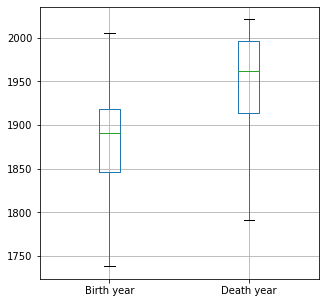

In [27]:
df_Years = pd.DataFrame(data = df, columns = ['Birth year','Death year'])
df_Years.boxplot(showfliers=False,grid=True,figsize=(5, 5))

In [30]:
df = df[df['Birth year'] >= 1800]

In [29]:
df.to_csv('AgeDataset-cleaned.csv', index = False)